In [1]:
from configure_dataframes import directory_to_dataframe
from check_labels import load_model, get_features, scale_and_reduce, plot_features, display_misclassified_images, train_and_identify_misclassifications, train_and_plot_svm

2023-08-08 19:59:29.528947: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-08 19:59:29.530389: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 19:59:29.573159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-08 19:59:29.575050: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 19:59:30.210366: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
df = directory_to_dataframe("data")

In [3]:
to_check = [
    "australia_assa_02",
    "australia_assa_62",
    "india_ooty_01",
    "glasgow_59",
    "swiss_landschlacht_01",
    "alaska_haarp_62",
    "humain_59",
]

In [4]:
df = df[df.instrument.isin(['australia_assa_02'])]
df.loc[:, "is_burst"] = df["burst_type"].apply(lambda x: 1 if x != "no_burst" else 0)

In [5]:
# Take sample
df = df.groupby('label').sample(n=100)
df = df.sort_values(by=['start_time'])

In [6]:
image_paths = df['file_path'].values

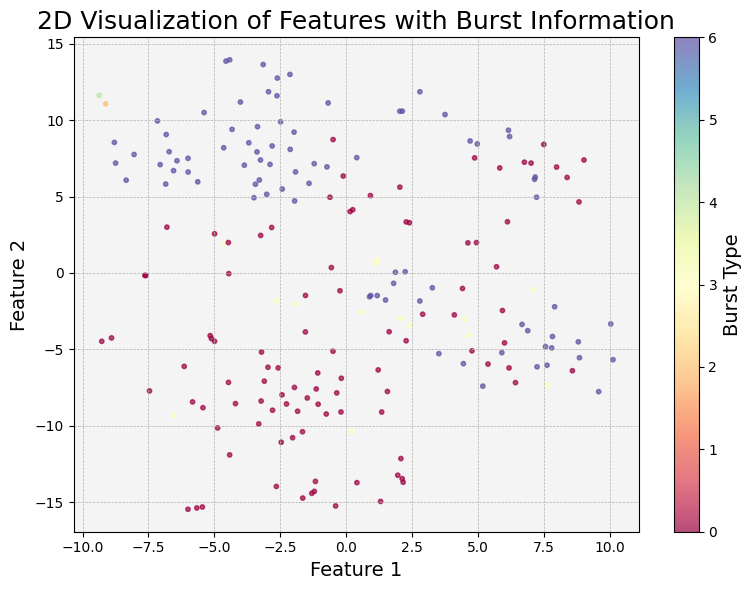

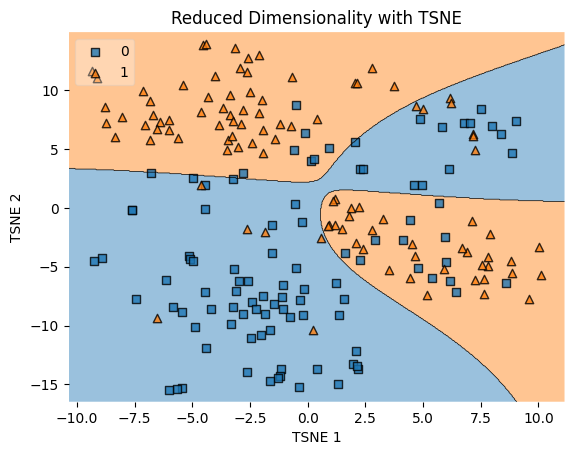

TypeError: train_and_identify_misclassifications() missing 1 required positional argument: 'df'

In [7]:
# Load your dataframe and perform your preprocessing here...
model = load_model()
features_list = [get_features(path, model, True) for path in image_paths]
low_dim_features = scale_and_reduce(features_list)

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(clf, low_dim_features, df['is_burst'].values, df)
print(f"Number of misclassified images: {len(df_missclassified)}")

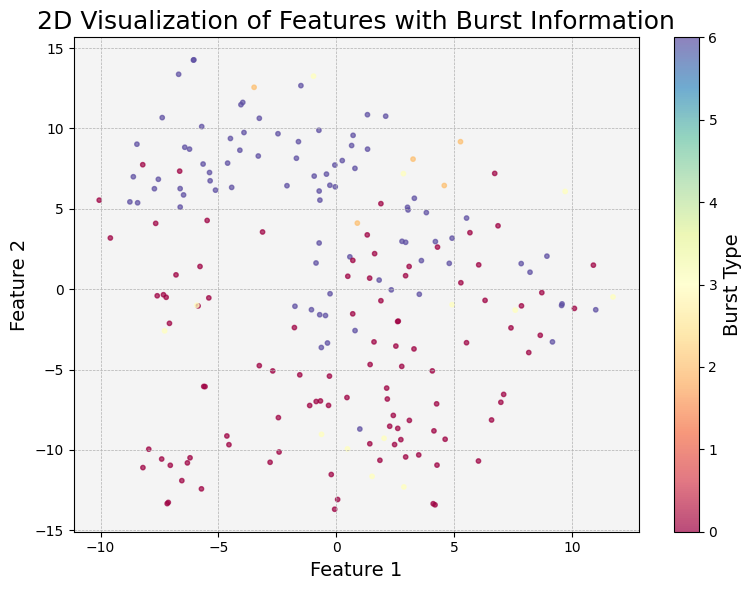

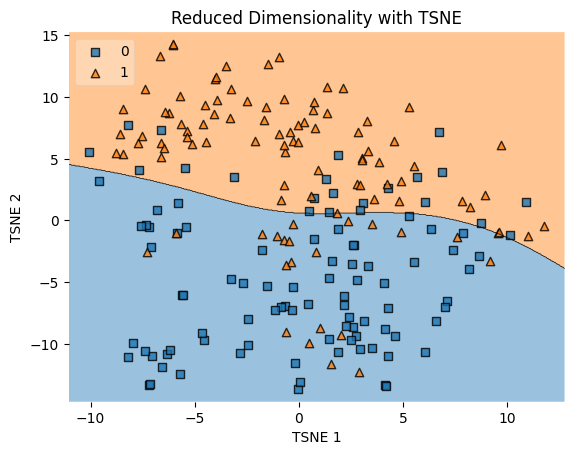

In [ ]:
# Load your dataframe and perform your preprocessing here...
model = load_model()
features_list = [get_features(path, model, False) for path in image_paths]
low_dim_features = scale_and_reduce(features_list)

plot_features(low_dim_features, df)
clf = train_and_plot_svm(low_dim_features, df)

df_missclassified = train_and_identify_misclassifications(clf, low_dim_features, df['is_burst'].values, df)
print(f"Number of misclassified images: {len(df_missclassified)}")

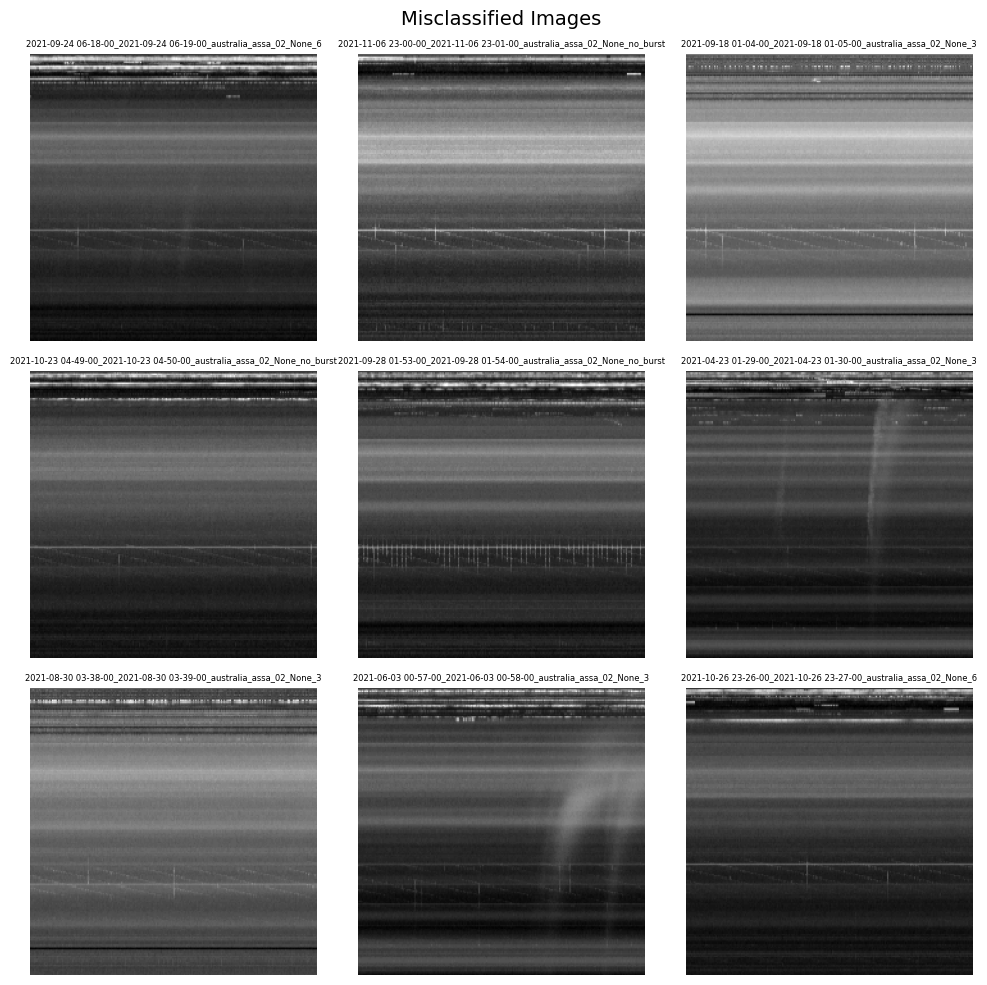

In [ ]:
df_missclassified = train_and_identify_misclassifications(clf, X=low_dim_features, y=df["is_burst"].values, df=df)

# Displaying misclassified images
display_misclassified_images(df_missclassified)